### Problem 1 - Time Series Analysis - NYPD Shooting Incident Data (24 pts)

Download the data from the following link: https://data.cityofnewyork.us/Public-Safety/NYPD-Shooting-Incident-Data-Historic-/833y-fsy8

You can find the CSV file by first clicking the 'Export' button on the webpage, and then clicking 'CSV'.

Read the descriptions of the dataset on the webpage. 

Like all previous homework, make sure you include the data file in your submission package. 

Read the data into a pandas dataframe. Do the normal checking on the dataframe, and then do the following.

1. Use the pandas `to_datetime` function to create a new column called `datetime` that include the complete date and time information of each shooting incident. Then set this column as the index of the dataframe. Then sort the incidents in chronological order (i.e., with the latest incidents at the bottom. Hint: check pandas function `sort_index`). Lastly, print the first few rows of the dataframe. 


2. Create a new column in the dataframe that shows the incident's day of the week in abbreviated names (e.g., Mon, Tue). Print the first few rows of the dataframe to show the new column. 


3. From the year 2014 to 2018 (both inclusive), what is the percentage of the shooting incidents that resulted in the victim’s death? Keep your answer in two decimal places, for example, 0.34, or 34%.  


4. Resample the data to show the **weekly** counts of the shooting incidents. Make a time series line plot that shows how the weekly counts of shooting incidents change over time. Hint: A handy way to plot this is to first select the column that you want to plot, then simply add `.plot()` at the end. Make sure to choose a suitable aspect ratio of your figure (e.g., 15-by-5), include important elements (e.g., x & y labels, title) and make the plot easy to read (e.g., larger fonts). Same requirements for all the following plots. 


5. Do the same thing as in Q4 above, but for **monthly** counts. 


6. Do the same thing as in Q4 above, but for **yearly** counts. Since there would be only a few data points, add markers in the line plot. Make sure the marker is easily visible. You can check the following link on how to customize markers.  https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.axes.Axes.plot.html


7. Use pandas `crosstab` function to create a line plot that shows how the shooting incident counts change month by month for each year. That is, there should be one line for each year, and the x-axis is the 12 months. 

    * Print the crosstab table.
    
    * Use the calendar library to get the abbreviated month names (e.g., Jan, Feb) and use them as the xticks label. (Google how to get the abbreviated month names!)


8. Again, use the `crosstab` function to create a cross tabulation with one dimension grouped by the five boroughs in NYC, and the other dimension grouped by year and month. Create a jitter plot that shows the monthly counts of shooting incidents in the five boroughs.

    * Print the crosstab table.
    
    * Adjust the jitter plot to avoid overplotting and improve the aesthetic.


9. Again, use the `crosstab` function to create a cross tabulation with one dimension grouped by day of week (use the column we created in Q2), and the other dimension grouped by year and month. Create a jitter plot that shows how the monthly counts of shooting incidents change in different days of week.

    * Print the crosstab table.
    
    * In the plot, make sure to show the day of week in order from Sun, Mon, ... to Sat. Hint: you may create a list of the order and pass that to an argument of the `stripplot` function. 
    
    * Adjust the jitter plot to avoid overplotting and improve the aesthetic.
    
    * Add a boxplot to the jitter plot, and set at least the following: set the `color` argument to white (`'w'`), completely remove the markers used to indicate outliers. You can keep the whiskers. 
    

10. **No need to answer this question**. Just check in question 4-6, do you see unique information from the weekly, monthly, and yearly plots?


11. **No need to answer this question**. If you are interested, you can do something similar to Q9 to check which hours of the day have the most and the least shooting in NYC. Any guesses before you plot it?


In [2]:
import numpy as np
import pandas as pd
import calendar

In [247]:
import seaborn as sb

In [167]:
from matplotlib import pyplot as plt

In [76]:
df = pd.read_csv("C:\\Users\\Administrator\\Downloads\\NYPD_Shooting_Incident_Data__Historic_.csv")

In [12]:
df.head()

,INCIDENT_KEY,OCCUR_DATE,OCCUR_TIME,BORO,PRECINCT,JURISDICTION_CODE,LOCATION_DESC,STATISTICAL_MURDER_FLAG,PERP_AGE_GROUP,PERP_SEX,PERP_RACE,VIC_AGE_GROUP,VIC_SEX,VIC_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude
0,169180023,09/09/2017,3:57:00,STATEN ISLAND,120,0.0,NaN,False,NaN,NaN,NaN,25-44,M,BLACK,959975,171772,40.638126,-74.087467
1,169180027,09/09/2017,22:15:00,BRONX,50,0.0,NaN,False,NaN,NaN,NaN,25-44,M,BLACK HISPANIC,1011288,255912,40.869061,-73.902242
2,169180025,09/09/2017,18:35:00,BROOKLYN,79,2.0,MULTI DWELL - PUBLIC HOUS,False,NaN,NaN,NaN,18-24,M,BLACK,999888,193014,40.696450,-73.943607
3,169180024,09/09/2017,15:20:00,BROOKLYN,67,0.0,NaN,False,18-24,M,BLACK,18-24,M,BLACK,997784,172132,40.639137,-73.951236
4,169180022,09/09/2017,0:20:00,BROOKLYN,61,2.0,MULTI DWELL - PUBLIC HOUS,False,NaN,NaN,NaN,25-44,M,ASIAN / PACIFIC ISLANDER,1001019,156467,40.596134,-73.939619


In [13]:
df.tail()

,INCIDENT_KEY,OCCUR_DATE,OCCUR_TIME,BORO,PRECINCT,JURISDICTION_CODE,LOCATION_DESC,STATISTICAL_MURDER_FLAG,PERP_AGE_GROUP,PERP_SEX,PERP_RACE,VIC_AGE_GROUP,VIC_SEX,VIC_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude
20654,173154491,01/01/2018,20:00:00,QUEENS,103,0.0,NaN,False,NaN,NaN,NaN,25-44,M,WHITE,"1,037,506","195,011",40.701785,-73.807931
20655,173135654,01/01/2018,6:30:00,BROOKLYN,70,0.0,BAR/NIGHT CLUB,False,NaN,NaN,NaN,18-24,M,BLACK,"996,108","176,259",40.650467,-73.957268
20656,173135654,01/01/2018,6:30:00,BROOKLYN,70,0.0,BAR/NIGHT CLUB,False,NaN,NaN,NaN,25-44,M,BLACK,"996,108","176,259",40.650467,-73.957268
20657,173132280,01/01/2018,1:30:00,BROOKLYN,73,0.0,NaN,False,NaN,NaN,NaN,25-44,M,BLACK,"1,009,357","177,370",40.653489,-73.909517
20658,173154856,01/01/2018,0:15:00,BRONX,40,0.0,NaN,False,NaN,NaN,NaN,25-44,M,BLACK,"1,005,432","233,240",40.806849,-73.923487


In [110]:
df.dtypes

incident_key                        int64
occur_date                         object
occur_time                         object
boro                               object
precinct                            int64
jurisdiction_code                 float64
location_desc                      object
statistical_murder_flag              bool
perp_age_group                     object
perp_sex                           object
perp_race                          object
vic_age_group                      object
vic_sex                            object
vic_race                           object
x_coord_cd                         object
y_coord_cd                         object
latitude                          float64
longitude                         float64
datetime                   datetime64[ns]
dtype: object

In [111]:
df.shape

(20659, 19)

#### Use the pandas to_datetime function to create a new column called datetime that include the complete date and time information of each shooting incident. Then set this column as the index of the dataframe. Then sort the incidents in chronological order (i.e., with the latest incidents at the bottom. Hint: check pandas function sort_index). Lastly, print the first few rows of the dataframe.

In [80]:
df.columns = map(lambda x : x.lower(),df.columns)

In [82]:
ls=[]
for i in df['occur_date']:
    ls.append(str(i))    

In [86]:
df['occur_date'] = ls

In [93]:
df['datetime']  = df['occur_date'] +" " + df['occur_time']

In [97]:
df['datetime']=pd.to_datetime(df['datetime'])

In [99]:
df['datetime'].dtype

dtype('<M8[ns]')

In [103]:
datetime_index_df = df.set_index(['datetime'])

In [106]:
datetime_index_df.sort_index(inplace=True)

In [108]:
datetime_index_df.head(5)

,incident_key,occur_date,occur_time,boro,precinct,jurisdiction_code,location_desc,statistical_murder_flag,perp_age_group,perp_sex,perp_race,vic_age_group,vic_sex,vic_race,x_coord_cd,y_coord_cd,latitude,longitude
datetime,,,,,,,,,,,,,,,,,,
2006-01-01 02:00:00,9953245,01/01/2006,2:00:00,BRONX,48,0.0,NONE,False,18-24,M,BLACK,<18,M,BLACK,1013405,251801,40.857771,-73.894606
2006-01-01 02:22:00,9953252,01/01/2006,2:22:00,MANHATTAN,28,0.0,NONE,True,25-44,M,BLACK,25-44,M,BLACK,998816,233545,40.807699,-73.947385
2006-01-01 02:34:00,9953250,01/01/2006,2:34:00,QUEENS,114,0.0,BAR/NIGHT CLUB,True,18-24,M,BLACK,25-44,M,BLACK,1002577,221583,40.774860,-73.933832
2006-01-01 02:34:00,9953250,01/01/2006,2:34:00,QUEENS,114,0.0,BAR/NIGHT CLUB,True,25-44,M,BLACK,25-44,M,BLACK,1002577,221583,40.774860,-73.933832
2006-01-01 03:30:00,9953247,01/01/2006,3:30:00,BROOKLYN,67,0.0,NaN,False,UNKNOWN,U,UNKNOWN,18-24,M,BLACK,999316,176460,40.651014,-73.945707


#### Create a new column in the dataframe that shows the incident's day of the week in abbreviated names (e.g., Mon, Tue). Print the first few rows of the dataframe to show the new column

In [328]:
datetime_index_df['day_of_the_week']=datetime_index_df.index.weekday_name

In [329]:
datetime_index_df.head(2)

,incident_key,occur_date,occur_time,boro,precinct,jurisdiction_code,location_desc,statistical_murder_flag,perp_age_group,perp_sex,...,vic_age_group,vic_sex,vic_race,x_coord_cd,y_coord_cd,latitude,longitude,day_of_the_week,year,month
datetime,,,,,,,,,,,,,,,,,,,,,
2006-01-01 02:00:00,9953245,01/01/2006,2:00:00,BRONX,48,0.0,NONE,False,18-24,M,...,<18,M,BLACK,1013405,251801,40.857771,-73.894606,Sunday,2006,1
2006-01-01 02:22:00,9953252,01/01/2006,2:22:00,MANHATTAN,28,0.0,NONE,True,25-44,M,...,25-44,M,BLACK,998816,233545,40.807699,-73.947385,Sunday,2006,1


In [147]:
ls_of_abb=[]
for i in datetime_index_df['day_of_the_week']:
    ls_of_abb.append(i[0:3])
datetime_index_df['day_of_the_week'] = ls_of_abb

In [149]:
datetime_index_df.head()

,incident_key,occur_date,occur_time,boro,precinct,jurisdiction_code,location_desc,statistical_murder_flag,perp_age_group,perp_sex,perp_race,vic_age_group,vic_sex,vic_race,x_coord_cd,y_coord_cd,latitude,longitude,day_of_the_week
datetime,,,,,,,,,,,,,,,,,,,
2006-01-01 02:00:00,9953245,01/01/2006,2:00:00,BRONX,48,0.0,NONE,False,18-24,M,BLACK,<18,M,BLACK,1013405,251801,40.857771,-73.894606,Sun
2006-01-01 02:22:00,9953252,01/01/2006,2:22:00,MANHATTAN,28,0.0,NONE,True,25-44,M,BLACK,25-44,M,BLACK,998816,233545,40.807699,-73.947385,Sun
2006-01-01 02:34:00,9953250,01/01/2006,2:34:00,QUEENS,114,0.0,BAR/NIGHT CLUB,True,18-24,M,BLACK,25-44,M,BLACK,1002577,221583,40.774860,-73.933832,Sun
2006-01-01 02:34:00,9953250,01/01/2006,2:34:00,QUEENS,114,0.0,BAR/NIGHT CLUB,True,25-44,M,BLACK,25-44,M,BLACK,1002577,221583,40.774860,-73.933832,Sun
2006-01-01 03:30:00,9953247,01/01/2006,3:30:00,BROOKLYN,67,0.0,NaN,False,UNKNOWN,U,UNKNOWN,18-24,M,BLACK,999316,176460,40.651014,-73.945707,Sun


### From the year 2014 to 2018 (both inclusive), what is the percentage of the shooting incidents that resulted in the victim’s death? Keep your answer in two decimal places, for example, 0.34, or 34%

In [154]:
df2014_2018 = datetime_index_df[datetime_index_df.index.year.isin([2014,2015,2016,2017,2018])]

In [160]:
percent = (df2014_2018[df2014_2018['statistical_murder_flag'] == True]['statistical_murder_flag'].count())/df2014_2018['statistical_murder_flag'].count()
print("percentage of the shooting incidents that resulted in the victim’s death between the year 2014 to 2018 :",int(round(percent,2)*100),"%")

percentage of the shooting incidents that resulted in the victim’s death between the year 2014 to 2018 : 19 %


### resample the data to show the weekly counts of the shooting incidents. Make a time series line plot that shows how the weekly counts of shooting incidents change over time. Hint: A handy way to plot this is to first select the column that you want to plot, then simply add .plot() at the end. Make sure to choose a suitable aspect ratio of your figure (e.g., 15-by-5), include important elements (e.g., x & y labels, title) and make the plot easy to read (e.g., larger fonts). Same requirements for all the following plots.

In [179]:
resampled_data_weekly = datetime_index_df.statistical_murder_flag.resample('W').count()

In [188]:
resampled_data_weekly.head(5)

datetime
2006-01-01     8
2006-01-08    26
2006-01-15    34
2006-01-22    37
2006-01-29    19
Freq: W-SUN, Name: statistical_murder_flag, dtype: int64

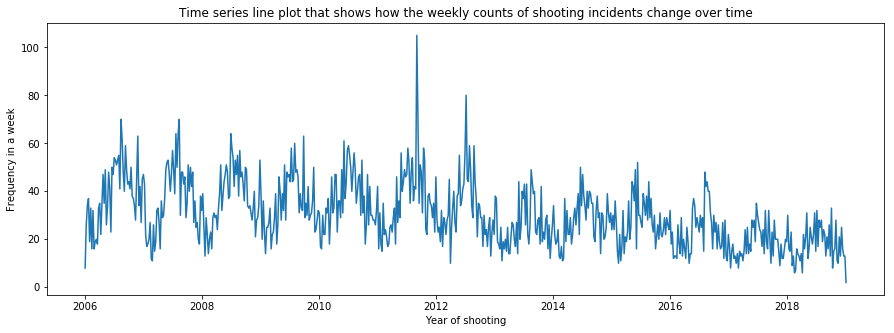

In [181]:
plt.figure(figsize=(15,5))
plt.plot(resampled_data_weekly)
plt.xlabel("Year of shooting")
plt.ylabel("Frequency in a week")
plt.title("Time series line plot that shows how the weekly counts of shooting incidents change over time")
plt.show()

## Do the same thing as in Q4 above, but for monthly counts.

In [190]:
resampled_data_monthly = datetime_index_df.statistical_murder_flag.resample('M').count()
resampled_data_monthly.head(5)

datetime
2006-01-31    129
2006-02-28     97
2006-03-31    102
2006-04-30    156
2006-05-31    173
Freq: M, Name: statistical_murder_flag, dtype: int64

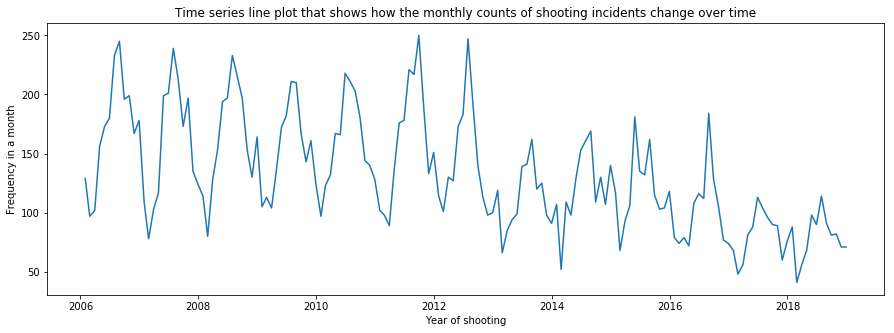

In [184]:
plt.figure(figsize=(15,5))
plt.plot(resampled_data_monthly)
plt.xlabel("Year of shooting")
plt.ylabel("Frequency in a month")
plt.title("Time series line plot that shows how the monthly counts of shooting incidents change over time")
plt.show()

## Do the same thing as in Q4 above, but for yearly counts. Since there would be only a few data points, add markers in the line plot. Make sure the marker is easily visible.

In [192]:
resampled_data_yearly = datetime_index_df.statistical_murder_flag.resample('Y').count()
resampled_data_yearly

datetime
2006-12-31    2055
2007-12-31    1887
2008-12-31    1958
2009-12-31    1828
2010-12-31    1910
2011-12-31    1939
2012-12-31    1717
2013-12-31    1339
2014-12-31    1464
2015-12-31    1434
2016-12-31    1208
2017-12-31     969
2018-12-31     951
Freq: A-DEC, Name: statistical_murder_flag, dtype: int64

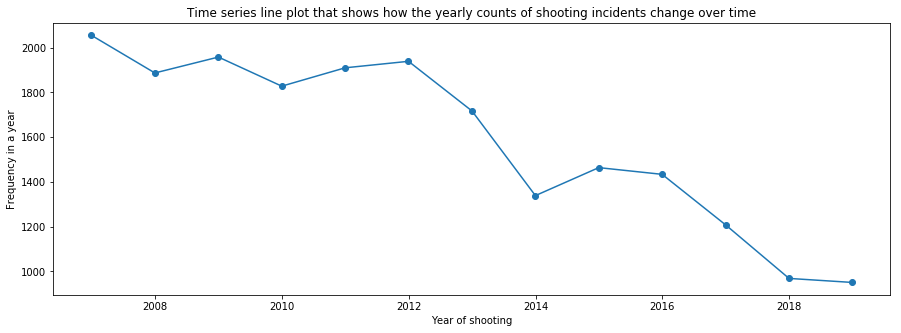

In [195]:
plt.figure(figsize=(15,5))
plt.plot(resampled_data_yearly,marker='o')
plt.xlabel("Year of shooting")
plt.ylabel("Frequency in a year")
plt.title("Time series line plot that shows how the yearly counts of shooting incidents change over time")
plt.show()

### Use pandas crosstab function to create a line plot that shows how the shooting incident counts change month by month for each year. That is, there should be one line for each year, and the x-axis is the 12 months.

- Print the crosstab table.

- Use the calendar library to get the abbreviated month names (e.g., Jan, Feb) and use them as the xticks label. (Google how to get the abbreviated month names!)



In [204]:
crosstab = pd.crosstab(datetime_index_df.index.month,datetime_index_df.index.year)

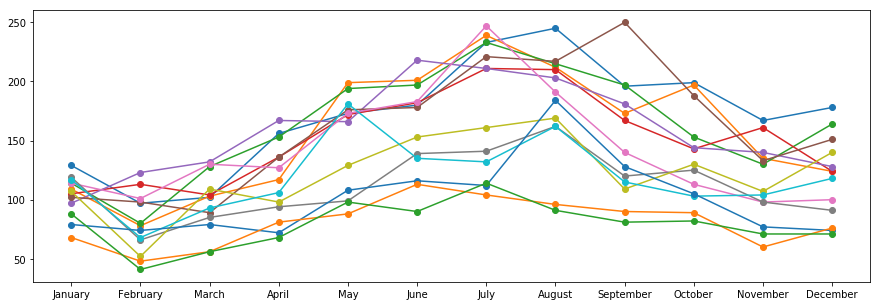

In [222]:
plt.figure(figsize=(15,5))
plt.plot(crosstab,marker='o')
plt.xticks(np.arange(1,13),calendar.month_name[1:13])
plt.show()

## Again, use the crosstab function to create a cross tabulation with one dimension grouped by the five boroughs in NYC, and the other dimension grouped by year and month. Create a jitter plot that shows the monthly counts of shooting incidents in the five boroughs.

- Print the crosstab table.

- Adjust the jitter plot to avoid overplotting and improve the aesthetic.

In [228]:
boroughs = datetime_index_df.groupby('boro')['statistical_murder_flag'].count()

In [304]:
datetime_index_df['year'] = datetime_index_df.index.year

In [305]:
datetime_index_df['month'] = datetime_index_df.index.month

In [323]:
db = datetime_index_df.groupby(['year','month','boro'])[['statistical_murder_flag']].count()
db = db.reset_index()

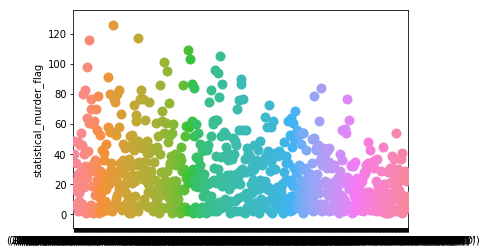

In [319]:
sb.stripplot(x=db.index,y=db['statistical_murder_flag'],jitter=True,size=10,dodge=True)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3692: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


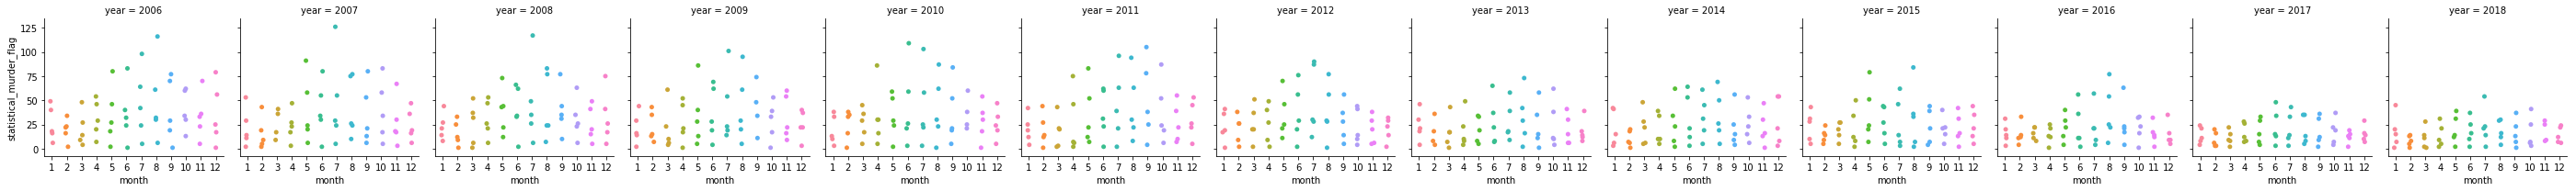

In [325]:
sb.catplot(x="month", y="statistical_murder_flag",col="year",data =db,kind="strip",jitter=True,size=3)

### Again, use the crosstab function to create a cross tabulation with one dimension grouped by day of week (use the column we created in Q2), and the other dimension grouped by year and month. Create a jitter plot that shows how the monthly counts of shooting incidents change in different days of week.

Print the crosstab table.

In the plot, make sure to show the day of week in order from Sun, Mon, ... to Sat. Hint: you may create a list of the order and pass that to an argument of the stripplot function.

Adjust the jitter plot to avoid overplotting and improve the aesthetic.

Add a boxplot to the jitter plot, and set at least the following: set the color argument to white ('w'), completely remove the markers used to indicate outliers. You can keep the whiskers.

In [333]:
db1 = pd.crosstab([datetime_index_df.index.year,datetime_index_df.index.month],datetime_index_df['day_of_the_week']).reset_index()

In [334]:
db1.head()

day_of_the_week,row_0,row_1,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,2006,1,13,23,16,30,16,18,13
1,2006,2,18,6,19,21,6,12,15
2,2006,3,17,16,19,16,19,9,6
3,2006,4,27,22,30,30,20,14,13
4,2006,5,19,28,23,38,19,21,25


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1233: RuntimeWarning: invalid value encountered in double_scalars
  loval = q1 - whis * stats['iqr']
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1234: RuntimeWarning: invalid value encountered in double_scalars
  hival = q3 + whis * stats['iqr']
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1246: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = np.compress(x <= hival, x)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1253: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = np.compress(x >= loval, x)


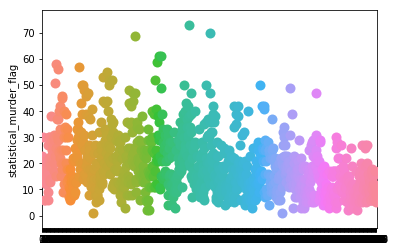

In [339]:
sb.boxplot(x=db1.index,y=db1['statistical_murder_flag'],data=db1, whis=np.inf)
sb.stripplot(x=db1.index,y=db1['statistical_murder_flag'],data=db1,jitter=True,size=10,dodge=True)

In [335]:
db1 = datetime_index_df.groupby(['year','month','day_of_the_week'])[['statistical_murder_flag']].count()
db1 = db1.reset_index()